In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate, integrate
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation, LinearTriInterpolator

In [2]:
def f(x, y):
    return x**2 + x*y + 2*y + 1

In [3]:
Nx, Ny = 21, 17
xl = np.linspace(-3, 3, Nx)
yl = np.linspace(-2, 2, Ny)

In [4]:
xl.shape

(21,)

In [5]:
yl.shape

(17,)

In [6]:
X, Y = np.meshgrid(xl, yl)

In [7]:
X.shape

(17, 21)

In [8]:
Y.shape

(17, 21)

In [9]:
Z = f(X, Y)

In [10]:
Z.shape

(17, 21)

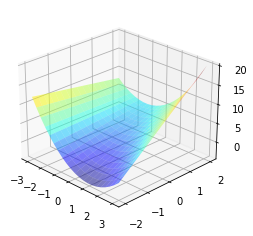

In [11]:
axe = plt.axes(projection='3d')
axe.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)
axe.view_init(elev=25, azim=-45)

In [12]:
dZdy, dZdx = np.gradient(Z, yl, xl, edge_order=1)

In [13]:
dZdx.shape

(17, 21)

In [14]:
dZdy.shape

(17, 21)

In [15]:
V = np.hypot(dZdx, dZdy)

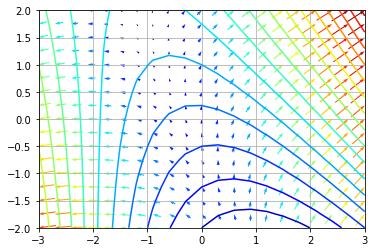

In [16]:
axe = plt.contour(X, Y, Z, 20, cmap='jet')
axe.axes.quiver(X, Y, dZdx, dZdy, V, units='x', pivot='tip', cmap='jet')
axe.axes.set_aspect('equal')
axe.axes.grid()

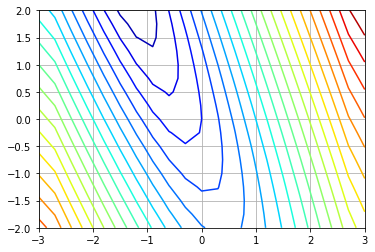

In [17]:
axe = plt.contour(X, Y, V, 20, cmap='jet')
axe.axes.set_aspect('equal')
axe.axes.grid()

In [18]:
SdZx = np.cumsum(dZdx, axis=1)*np.diff(xl)[0]
SdZy = np.cumsum(dZdy, axis=0)*np.diff(yl)[0]

In [19]:
Zhat = np.zeros(SdZx.shape)
for i in range(Zhat.shape[0]):
    for j in range(Zhat.shape[1]):
        Zhat[i,j] += np.sum([SdZy[i,0], -SdZy[0,0], SdZx[i,j], -SdZx[i,0]])

In [20]:
Zhat += Z[0,0] - Zhat[0,0]

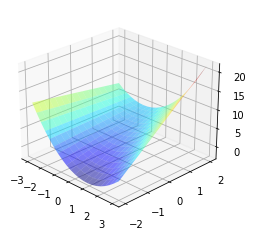

In [21]:
axe = plt.axes(projection='3d')
axe.plot_surface(X, Y, Zhat, cmap='jet', alpha=0.5)
axe.view_init(elev=25, azim=-45)

In [22]:
zl = np.arange(-4, 21, 1)
zl

array([-4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19, 20])

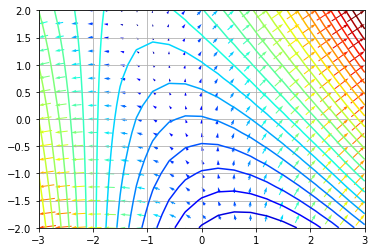

In [23]:
axe = plt.contour(X, Y, Zhat, zl, cmap='jet')
axe.axes.quiver(X, Y, dZdx, dZdy, V, units='x', pivot='tip', cmap='jet')
axe.axes.set_aspect('equal')
axe.axes.grid()

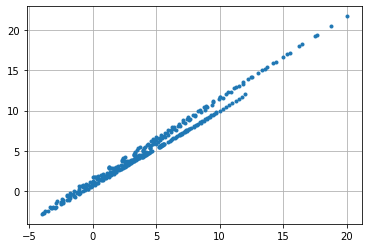

In [24]:
fig, axe = plt.subplots()
axe.plot(Z.ravel(), Zhat.ravel(), '.')
axe.grid()

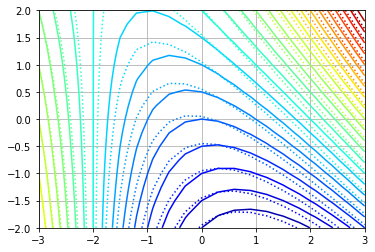

In [25]:
axe = plt.contour(X, Y, Z, zl, cmap='jet')
axe.axes.contour(X, Y, Zhat, zl, cmap='jet', linestyles=':')
axe.axes.set_aspect('equal')
axe.axes.grid()

In [26]:
Z.max()

20.0